# The Classic Birthday Problem

Probability of no match: $$\frac{365!}{(365-n)!365^n}$$

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom, factorial
from decimal import Decimal
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
def factorial_division(num, denom):
    # Avoid ridiculously large numbers
    res = 1
    while num > denom:
        res *= Decimal(num)
        num -= 1
    return res
def choose(n,k):
    '''
    Calculates n choose k (i.e. Binomial Coefficient aka Combination).
    '''
    if 0 < k <= n:
        
        #since choose(n,k)==choose(n,n-k), 
        #if k > n-k, substitute n-k for k for faster computation.
        if k > n-k: k = n-k
            
        num = 1
        denom = 1
        while k > 0:
            num *= n
            n -= 1
            denom *= k
            k -= 1
        return num // denom
    else:
        return 0
    
def array_wrapper(fun, arr):
    '''Takes a function and an array, returns the resulting array'''
    return [fun(x) for x in arr]

In [243]:
def two_birthdays(n):
    '''Returns the possibility of having at least 1 match of birthdays given n people'''
    if isinstance(n, int):
        return 1-factorial_division(365,365-n)/Decimal(365**n)
    else:
        arr = []
        for x in n:
            arr.append(1-factorial_division(365,365-x)/Decimal(365**x))
        return arr

# The 3-Person Birthday Problem

In [233]:
def three(n):
    summ = 0

    # Different # Couples
    i = 0 # Number of couples
    while i <= n/2:
        non_same = n - 2*i
        sames_factor = factorial_division(365,365-i)/Decimal(365**(2*i))
        non_sames_factor = factorial_division(365-i,365-n+i)/Decimal(365**(non_same))
        count = factorial_division(n,non_same)/Decimal(2**(i)*factorial(i))
        summ += count*sames_factor*non_sames_factor
        #print(f'i{i}: {count*sames_factor*non_sames_factor}')
        #print(f'Sames    : 365!/{365-i}!*365^{2*i}')
        #print(f'Non Sames: {365-i}!/{365-n+i}!*365^{non_same}')
        #print(f'Count    : FacDiv({n},{non_same})/(2^{i}*{i}!)')
        i+= 1    
    return 1 - summ

ns = np.linspace(1,175,175)

y = two_birthdays(ns)
z = array_wrapper(three,ns)

/home/don/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  
/home/don/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':


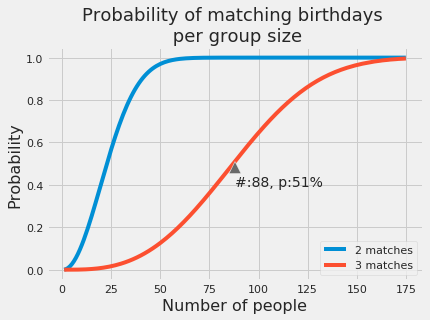

In [242]:
fig, ax = plt.subplots()
ax.plot(ns, y, label='2 matches')
ax.plot(ns, z, label='3 matches')
ax.annotate('#:88, p:51%',
            xy=(88, 0.51), xycoords='data',
            xytext=(0.617, 0.45), textcoords='axes fraction',
            arrowprops=dict(facecolor='dimgrey', shrink=0.001),
            horizontalalignment='center', verticalalignment='top')
plt.ylabel('Probability', fontsize=16)
plt.xlabel('Number of people',fontsize=16)
plt.title('Probability of matching birthdays \n per group size',fontsize=18)
ax.legend()
plt.show()

# Expected Values

In [ ]:
def m_birthdays_exp(n,m):
    return binom(n,m)/365**(m-1)
    
ns = np.linspace(21,120,100)
y = two_birthdays_exp(ns)
m = 2
plt.plot(ns, m_birthdays_exp(ns,m),label=f'm = {m}')
m = 3
plt.plot(ns, m_birthdays_exp(ns,m),label=f'm = {m}')
plt.ylim([0,2])
plt.ylabel('Expected Value')
plt.xlabel('Number of people')
plt.legend()
plt.show()

print(m_birthdays_exp(23,2))

In [ ]:
def half_chance(ns, arr):
    positives = [[ns[ix],x] for ix, x in enumerate(arr) if x > 0.5]
    half = positives[0]
    return half


for y in np.arange(2,15):
    print(i,half_chance(ns,m_birthdays(ns,y)))
    


# Simulation
Simulation is surprisingly easy!

In [102]:
c = 0
for i in range(100000):
    a=np.random.choice(365,88)
    if np.unique(a,return_counts=True)[1].max() >= 3:
        c += 1
        
c

53446

In [202]:
three(88)

Decimal('0.5110651106247305129281993914')